# Cocaine Connectivity Data PCA
Description of data:  
Time (s): 0 ~ 1799 per recording



In [185]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from IPython.core import display as ICD
import pandas as pd
import glob, os
import seaborn as sns
from sklearn import svm
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [187]:
print("[INFO] loading data...\n")

#loading csv file 
multisite_df = pd.read_csv('drive/My Drive/Projects/pilot_mouse_connectivity/cocaine_two_mice/Spectrogram_data/updated_data/multisite_averaged_data.csv')

ICD.display(multisite_df.head())

[INFO] loading data...



,Unnamed: 0,PFC gamma,VTA gamma,BLA gamma,NAc gamma,PFC beta,VTA beta,BLA beta,NAc beta,PFC theta,VTA theta,BLA theta,NAc theta,reference wires,mouse id,Time (s),Speed (cm/s),cocaine status,recording
0,0,-56.501194,-58.404691,-53.796707,-54.683450,-50.765295,-49.201600,-47.156084,-47.257051,-37.099407,-37.333310,-35.815629,-36.039001,31.250000,1,0,0.461047,post,1
1,1,-55.990462,-58.988152,-54.108313,-53.480236,-49.899241,-49.516848,-45.858436,-48.210181,-40.991329,-42.757552,-36.514741,-38.500080,-40.040267,1,1,0.482850,post,1
2,2,-56.533964,-56.703969,-53.713006,-53.388769,-47.988294,-47.911166,-45.839712,-44.819948,-36.329574,-36.786060,-34.261496,-38.705199,-46.110695,1,2,0.490247,post,1
3,3,-55.088293,-57.277582,-54.759970,-53.832872,-49.272411,-47.161322,-46.172072,-46.595272,-37.772853,-33.544189,-36.755222,-39.528779,-41.637959,1,3,0.485528,post,1
4,4,-56.064453,-56.391981,-54.370658,-54.151737,-48.075181,-44.963544,-47.350350,-44.067891,-41.780323,-37.090223,-37.366601,-36.990245,-39.613447,1,4,0.494177,post,1


In [188]:
print("[INFO] dropping 'Unnamed: 0' column...\n" )
multisite_df.drop("Unnamed: 0", axis=1,inplace=True)

ICD.display(multisite_df.head())

[INFO] dropping 'Unnamed: 0' column...



,PFC gamma,VTA gamma,BLA gamma,NAc gamma,PFC beta,VTA beta,BLA beta,NAc beta,PFC theta,VTA theta,BLA theta,NAc theta,reference wires,mouse id,Time (s),Speed (cm/s),cocaine status,recording
0,-56.501194,-58.404691,-53.796707,-54.683450,-50.765295,-49.201600,-47.156084,-47.257051,-37.099407,-37.333310,-35.815629,-36.039001,31.250000,1,0,0.461047,post,1
1,-55.990462,-58.988152,-54.108313,-53.480236,-49.899241,-49.516848,-45.858436,-48.210181,-40.991329,-42.757552,-36.514741,-38.500080,-40.040267,1,1,0.482850,post,1
2,-56.533964,-56.703969,-53.713006,-53.388769,-47.988294,-47.911166,-45.839712,-44.819948,-36.329574,-36.786060,-34.261496,-38.705199,-46.110695,1,2,0.490247,post,1
3,-55.088293,-57.277582,-54.759970,-53.832872,-49.272411,-47.161322,-46.172072,-46.595272,-37.772853,-33.544189,-36.755222,-39.528779,-41.637959,1,3,0.485528,post,1
4,-56.064453,-56.391981,-54.370658,-54.151737,-48.075181,-44.963544,-47.350350,-44.067891,-41.780323,-37.090223,-37.366601,-36.990245,-39.613447,1,4,0.494177,post,1


In [189]:
print(['[INFO] getting information on the data...'])

['[INFO] getting information on the data...']


In [190]:
multisite_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14400 entries, 0 to 14399
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PFC gamma        14400 non-null  float64
 1   VTA gamma        14400 non-null  float64
 2   BLA gamma        14400 non-null  float64
 3   NAc gamma        14400 non-null  float64
 4   PFC beta         14400 non-null  float64
 5   VTA beta         14400 non-null  float64
 6   BLA beta         14400 non-null  float64
 7   NAc beta         14400 non-null  float64
 8   PFC theta        14400 non-null  float64
 9   VTA theta        14400 non-null  float64
 10  BLA theta        14400 non-null  float64
 11  NAc theta        14400 non-null  float64
 12  reference wires  7200 non-null   float64
 13  mouse id         14400 non-null  int64  
 14  Time (s)         14400 non-null  int64  
 15  Speed (cm/s)     14399 non-null  float64
 16  cocaine status   14400 non-null  object 
 17  recording   

In [191]:
multisite_df.describe()

,PFC gamma,VTA gamma,BLA gamma,NAc gamma,PFC beta,VTA beta,BLA beta,NAc beta,PFC theta,VTA theta,BLA theta,NAc theta,reference wires,mouse id,Time (s),Speed (cm/s),recording
count,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,14400.000000,7200.000000,14400.000000,14400.000000,14399.000000,14400.000000
mean,-54.811637,-56.846061,-55.961131,-55.798637,-48.159617,-49.001847,-47.883579,-48.442821,-38.243090,-38.322204,-38.461431,-38.774405,-56.379793,1.500000,899.500000,6.688596,1.500000
std,2.068423,2.352484,4.713378,3.505149,2.950827,2.893824,5.451147,3.621962,4.121070,3.733250,6.142054,4.473741,18.233053,0.500017,519.633205,7.822517,0.500017
min,-62.967683,-64.722694,-67.979530,-67.626881,-57.557590,-58.086337,-62.919179,-61.141950,-57.748825,-54.368922,-59.110206,-55.570155,-89.470184,1.000000,0.000000,0.000000,1.000000
25%,-56.387963,-58.299689,-58.432244,-57.016779,-50.345994,-51.035358,-51.110122,-49.866365,-40.839729,-40.866794,-42.222446,-41.092209,-82.724009,1.000000,449.750000,1.164009,1.000000
50%,-54.541846,-57.145421,-53.902102,-54.786533,-48.060410,-49.510781,-45.915615,-47.786480,-38.302393,-38.879714,-36.376327,-38.043777,-46.910281,1.500000,899.500000,3.520864,1.500000
75%,-53.394415,-55.446176,-52.687571,-53.380062,-46.273530,-47.395109,-44.063579,-46.073310,-35.584788,-36.101646,-34.150518,-35.940170,-43.731854,2.000000,1349.250000,9.663074,2.000000
max,-31.735852,-23.039573,-33.301535,-38.456308,-22.255495,-22.977058,-22.722149,-28.808064,-13.607474,-16.428050,-16.403773,-18.287559,31.250000,2.000000,1799.000000,46.229302,2.000000


In [192]:
print("[INFO] filling NaN values with average...\n")
multisite_df.fillna(multisite_df.mean(), inplace=True)
ICD.display(multisite_df.head())

[INFO] filling NaN values with average...



,PFC gamma,VTA gamma,BLA gamma,NAc gamma,PFC beta,VTA beta,BLA beta,NAc beta,PFC theta,VTA theta,BLA theta,NAc theta,reference wires,mouse id,Time (s),Speed (cm/s),cocaine status,recording
0,-56.501194,-58.404691,-53.796707,-54.683450,-50.765295,-49.201600,-47.156084,-47.257051,-37.099407,-37.333310,-35.815629,-36.039001,31.250000,1,0,0.461047,post,1
1,-55.990462,-58.988152,-54.108313,-53.480236,-49.899241,-49.516848,-45.858436,-48.210181,-40.991329,-42.757552,-36.514741,-38.500080,-40.040267,1,1,0.482850,post,1
2,-56.533964,-56.703969,-53.713006,-53.388769,-47.988294,-47.911166,-45.839712,-44.819948,-36.329574,-36.786060,-34.261496,-38.705199,-46.110695,1,2,0.490247,post,1
3,-55.088293,-57.277582,-54.759970,-53.832872,-49.272411,-47.161322,-46.172072,-46.595272,-37.772853,-33.544189,-36.755222,-39.528779,-41.637959,1,3,0.485528,post,1
4,-56.064453,-56.391981,-54.370658,-54.151737,-48.075181,-44.963544,-47.350350,-44.067891,-41.780323,-37.090223,-37.366601,-36.990245,-39.613447,1,4,0.494177,post,1


In [193]:
print("[INFO] scaling the region columns...\n")

# set new df
scaled_df = multisite_df.loc[:,:]

# set scare obj
scaler = MinMaxScaler()
scaled_df[['PFC gamma', 'VTA gamma', 'BLA gamma', 'NAc gamma', 
           'PFC beta', 'VTA beta', 'BLA beta', 'NAc beta', 'PFC theta',
           'VTA theta', 'BLA theta', 'NAc theta', 'reference wires']] = scaler.fit_transform(scaled_df[['PFC gamma', 'VTA gamma', 'BLA gamma', 'NAc gamma',
                                                                                                       'PFC beta', 'VTA beta', 'BLA beta', 'NAc beta', 'PFC theta',
                                                                                                       'VTA theta', 'BLA theta', 'NAc theta', 'reference wires']])
       
ICD.display(scaled_df.head())

[INFO] scaling the region columns...



,PFC gamma,VTA gamma,BLA gamma,NAc gamma,PFC beta,VTA beta,BLA beta,NAc beta,PFC theta,VTA theta,BLA theta,NAc theta,reference wires,mouse id,Time (s),Speed (cm/s),cocaine status,recording
0,0.207048,0.151572,0.408986,0.443715,0.192405,0.253060,0.392146,0.429423,0.467802,0.449004,0.545458,0.523868,1.000000,1,0,0.461047,post,1
1,0.223401,0.137575,0.400001,0.484963,0.216938,0.244080,0.424428,0.399945,0.379633,0.306039,0.529088,0.457856,0.409459,1,1,0.482850,post,1
2,0.205999,0.192373,0.411400,0.488098,0.271069,0.289814,0.424894,0.504796,0.485242,0.463428,0.581849,0.452355,0.359173,1,2,0.490247,post,1
3,0.252287,0.178612,0.381209,0.472874,0.234694,0.311172,0.416625,0.449890,0.452546,0.548873,0.523457,0.430264,0.396224,1,3,0.485528,post,1
4,0.221032,0.199858,0.392435,0.461943,0.268608,0.373770,0.387313,0.528055,0.361758,0.455411,0.509141,0.498353,0.412994,1,4,0.494177,post,1


In [194]:
print('[INFO] setting the x input variable...')
x = scaled_df.loc[:, ['PFC gamma', 'VTA gamma', 'BLA gamma', 'NAc gamma', 'PFC beta',
       'VTA beta', 'BLA beta', 'NAc beta', 'PFC theta', 'VTA theta', 'BLA theta', 'NAc theta']]

[INFO] setting the x input variable...


In [ ]:
def fit_pca(n_components):
  print('[INFO] setting the PCA model and fitting with x...\n')

  from sklearn.decomposition import PCA
  pca = PCA(n_components=n_components)
  principalComponents = pca.fit_transform(x)

  print("PCA model: \n%s \n\nPrincipal Components: \n%s"%(pca,principalComponents))
  
  print("\nPCA variance: ", pca.explained_variance_ratio_)

  return pca, principalComponents;

In [ ]:
def make_principalComponent_df(principalComponents,n_components,multisite_df):

  print("\n[INFO] making a datafame with principal compenents...\n")

  pc_list=[]

  # set the df column names
  for i in range(1,n_components+1):
    col_name = "principal component %i"%i
    pc_list.append(col_name)

  principal_df = pd.DataFrame(data = principalComponents, columns =pc_list)
  ICD.display(principal_df.describe())

  print("\n[INFO] combining PC dataframe and the target...\n")
  principal_df = pd.concat([principal_df, multisite_df[['cocaine status']]], axis = 1)
  ICD.display(principal_df.describe())

  return principal_df;

In [ ]:
def visualize_heatmap(n_components,cmap):
  
  print('\n[INFO] visualizing heatmap...')

  y_labelsA = []
  y_labelsB = []

  title="%i-Component PCA"%n_components
  for i in range(1,n_components+1):

    label_name="PC %i"%i
    y_labelsA.append(i-1)
    y_labelsB.append(label_name)

  plt.matshow(pca.components_,cmap=cmap)
  plt.yticks(y_labelsA, y_labelsB, fontsize=10)
  plt.colorbar()
  #plt.title(title)
  plt.xticks(range(len(['PFC gamma', 'VTA gamma', 'BLA gamma', 'NAc gamma', 'PFC beta',
        'VTA beta', 'BLA beta', 'NAc beta', 'PFC theta', 'VTA theta', 'BLA theta', 'NAc theta'])),['PFC gamma', 'VTA gamma', 'BLA gamma', 'NAc gamma', 'PFC beta',
        'VTA beta', 'BLA beta', 'NAc beta', 'PFC theta', 'VTA theta', 'BLA theta', 'NAc theta'],rotation=65,ha='left')
  plt.tight_layout()
  plt.show()

## Running 2 component PCA 

[INFO] setting the PCA model and fitting with x...

PCA model: 
PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False) 

Principal Components: 
[[ 0.11039182 -0.05906303]
 [ 0.12719582 -0.06431592]
 [ 0.14984475 -0.0455044 ]
 ...
 [ 0.11111446 -0.06660845]
 [ 0.12038668 -0.03685936]
 [ 0.12380694  0.07562177]]

PCA variance:  [0.41514774 0.23475438]

[INFO] making a datafame with principal compenents...



,principal component 1,principal component 2
count,1.440000e+04,1.440000e+04
mean,-2.704530e-17,2.761786e-16
std,2.399463e-01,1.804345e-01
min,-5.781281e-01,-6.338429e-01
25%,-2.243402e-01,-9.909111e-02
50%,1.098327e-01,-5.813392e-02
75%,1.860371e-01,5.578822e-04
max,9.670712e-01,7.503676e-01



[INFO] combining PC dataframe and the target...



,principal component 1,principal component 2
count,1.440000e+04,1.440000e+04
mean,-2.704530e-17,2.761786e-16
std,2.399463e-01,1.804345e-01
min,-5.781281e-01,-6.338429e-01
25%,-2.243402e-01,-9.909111e-02
50%,1.098327e-01,-5.813392e-02
75%,1.860371e-01,5.578822e-04
max,9.670712e-01,7.503676e-01



[INFO] visualizing heatmap...


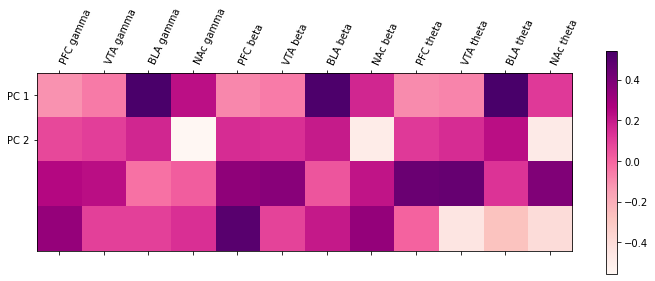

In [199]:
pca2, principalComponents2 = fit_pca(n_components=2)
pca2_df = make_principalComponent_df(principalComponents2, 2, multisite_df)
visualize_heatmap(n_components=2,cmap='RdPu')

[INFO] visualizing principal components...


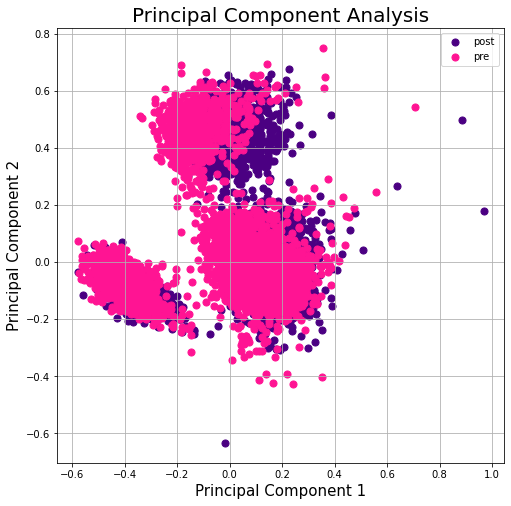

In [200]:
print('[INFO] visualizing principal components...')


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Principal Component Analysis', fontsize = 20)
targets = ['post', 'pre']
colors = ['indigo', 'deeppink']
for target, color in zip(targets,colors):
    indicesToKeep = pca2_df['cocaine status'] == target
    ax.scatter(pca2_df.loc[indicesToKeep, 'principal component 1']
               , pca2_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


## Running 4 component PCA

[INFO] setting the PCA model and fitting with x...

PCA model: 
PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False) 

Principal Components: 
[[ 0.11039182 -0.05906303  0.01788757 -0.08929888]
 [ 0.12719582 -0.06431592 -0.11241014  0.02256033]
 [ 0.14984475 -0.0455044   0.07825732  0.0075555 ]
 ...
 [ 0.11111446 -0.06660845 -0.16190964 -0.03679915]
 [ 0.12038668 -0.03685936 -0.3225607  -0.10355397]
 [ 0.12380694  0.07562177 -0.16043037 -0.03825978]]

PCA variance:  [0.41514774 0.23475438 0.1923754  0.04265356]

[INFO] making a datafame with principal compenents...



,principal component 1,principal component 2,principal component 3,principal component 4
count,1.440000e+04,1.440000e+04,1.440000e+04,1.440000e+04
mean,-3.345029e-17,2.677825e-16,-1.517498e-17,-4.043062e-17
std,2.399463e-01,1.804345e-01,1.633381e-01,7.691134e-02
min,-5.781281e-01,-6.338429e-01,-5.236496e-01,-3.450161e-01
25%,-2.243402e-01,-9.909111e-02,-1.075333e-01,-4.727147e-02
50%,1.098327e-01,-5.813392e-02,-2.133858e-02,-2.472790e-04
75%,1.860371e-01,5.578822e-04,7.893992e-02,5.066465e-02
max,9.670712e-01,7.503676e-01,1.379992e+00,5.663717e-01



[INFO] combining PC dataframe and the target...



,principal component 1,principal component 2,principal component 3,principal component 4
count,1.440000e+04,1.440000e+04,1.440000e+04,1.440000e+04
mean,-3.345029e-17,2.677825e-16,-1.517498e-17,-4.043062e-17
std,2.399463e-01,1.804345e-01,1.633381e-01,7.691134e-02
min,-5.781281e-01,-6.338429e-01,-5.236496e-01,-3.450161e-01
25%,-2.243402e-01,-9.909111e-02,-1.075333e-01,-4.727147e-02
50%,1.098327e-01,-5.813392e-02,-2.133858e-02,-2.472790e-04
75%,1.860371e-01,5.578822e-04,7.893992e-02,5.066465e-02
max,9.670712e-01,7.503676e-01,1.379992e+00,5.663717e-01



[INFO] visualizing heatmap...


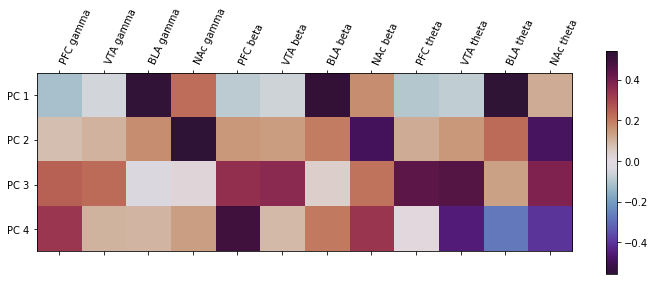

In [201]:
pca4, principalComponents4 = fit_pca(n_components=4)
pca4_df = make_principalComponent_df(principalComponents4, 4, multisite_df)
visualize_heatmap(n_components=4,cmap='twilight_shifted')